# Step 1: Investigate the taxonomic profile of the reads

In [2]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
day = {}
for filepath in glob.iglob('week13_data/KRAKEN/SRR*.kraken'):
    name = filepath[26:28]
    frequency = {}
    with open(filepath,'r') as f:
        for line in f:
            tax = line.split(';')
            try:
                species = tax[-3]
                frequency.setdefault(species,0)
                frequency[species]+=1
            except IndexError:
                pass
    day[name] = frequency

day_df = pd.DataFrame(day)

In [5]:
day_nonan = day_df.dropna()
day_nonan

,93,83,89,97,90,86,94,88
Enterococcaceae,950537.0,772811.0,1077359.0,686562.0,954839.0,1100019.0,822410.0,1057369.0
Enterococcus,306463.0,255090.0,353151.0,264741.0,318185.0,380634.0,264684.0,379945.0
Cutibacterium,46300.0,277677.0,29.0,435897.0,185.0,64.0,47332.0,153.0
Staphylococcaceae,228205.0,216202.0,108419.0,114842.0,169401.0,83963.0,294659.0,119905.0
Staphylococcus,69042.0,67867.0,35465.0,27283.0,52358.0,28460.0,53416.0,40320.0
...,...,...,...,...,...,...,...,...
Streptococcus anginosus group,3.0,5.0,7.0,520.0,11.0,2.0,32.0,5.0
Carnobacteriaceae,2.0,5.0,4.0,26.0,7.0,6.0,9.0,1.0
Pediococcus,2.0,1.0,1.0,11.0,2.0,2.0,2.0,1.0
Streptococcus dysgalactiae,1.0,3.0,6.0,5.0,5.0,3.0,3.0,7.0


In [6]:
normalized_day=day_nonan.div(day_nonan.sum(axis=0),axis=1)
normalized_day2 = normalized_day[["83","86","88","89","90","93","94","97"]]

In [7]:
normalized_day2.columns = ["Day 1","Day 2","Day 3","Day 4","Day 5","Day 6","Day 7","Day 8"]

In [8]:
normalized_day2

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8
Enterococcaceae,4.748029e-01,0.677415,6.483617e-01,6.704568e-01,0.625410,5.787336e-01,0.535663,0.435956
Enterococcus,1.567233e-01,0.234402,2.329762e-01,2.197712e-01,0.208408,1.865897e-01,0.172398,0.168106
Cutibacterium,1.706004e-01,0.000039,9.381714e-05,1.804714e-05,0.000121,2.818971e-02,0.030829,0.276788
Staphylococcaceae,1.328311e-01,0.051706,7.352382e-02,6.747078e-02,0.110956,1.389424e-01,0.191921,0.072923
Staphylococcus,4.169641e-02,0.017526,2.472358e-02,2.207040e-02,0.034294,4.203616e-02,0.034792,0.017324
...,...,...,...,...,...,...,...,...
Streptococcus anginosus group,3.071921e-06,0.000001,3.065920e-06,4.356206e-06,0.000007,1.826547e-06,0.000021,0.000330
Carnobacteriaceae,3.071921e-06,0.000004,6.131839e-07,2.489260e-06,0.000005,1.217698e-06,0.000006,0.000017
Pediococcus,6.143842e-07,0.000001,6.131839e-07,6.223151e-07,0.000001,1.217698e-06,0.000001,0.000007
Streptococcus dysgalactiae,1.843153e-06,0.000002,4.292288e-06,3.733891e-06,0.000003,6.088491e-07,0.000002,0.000003


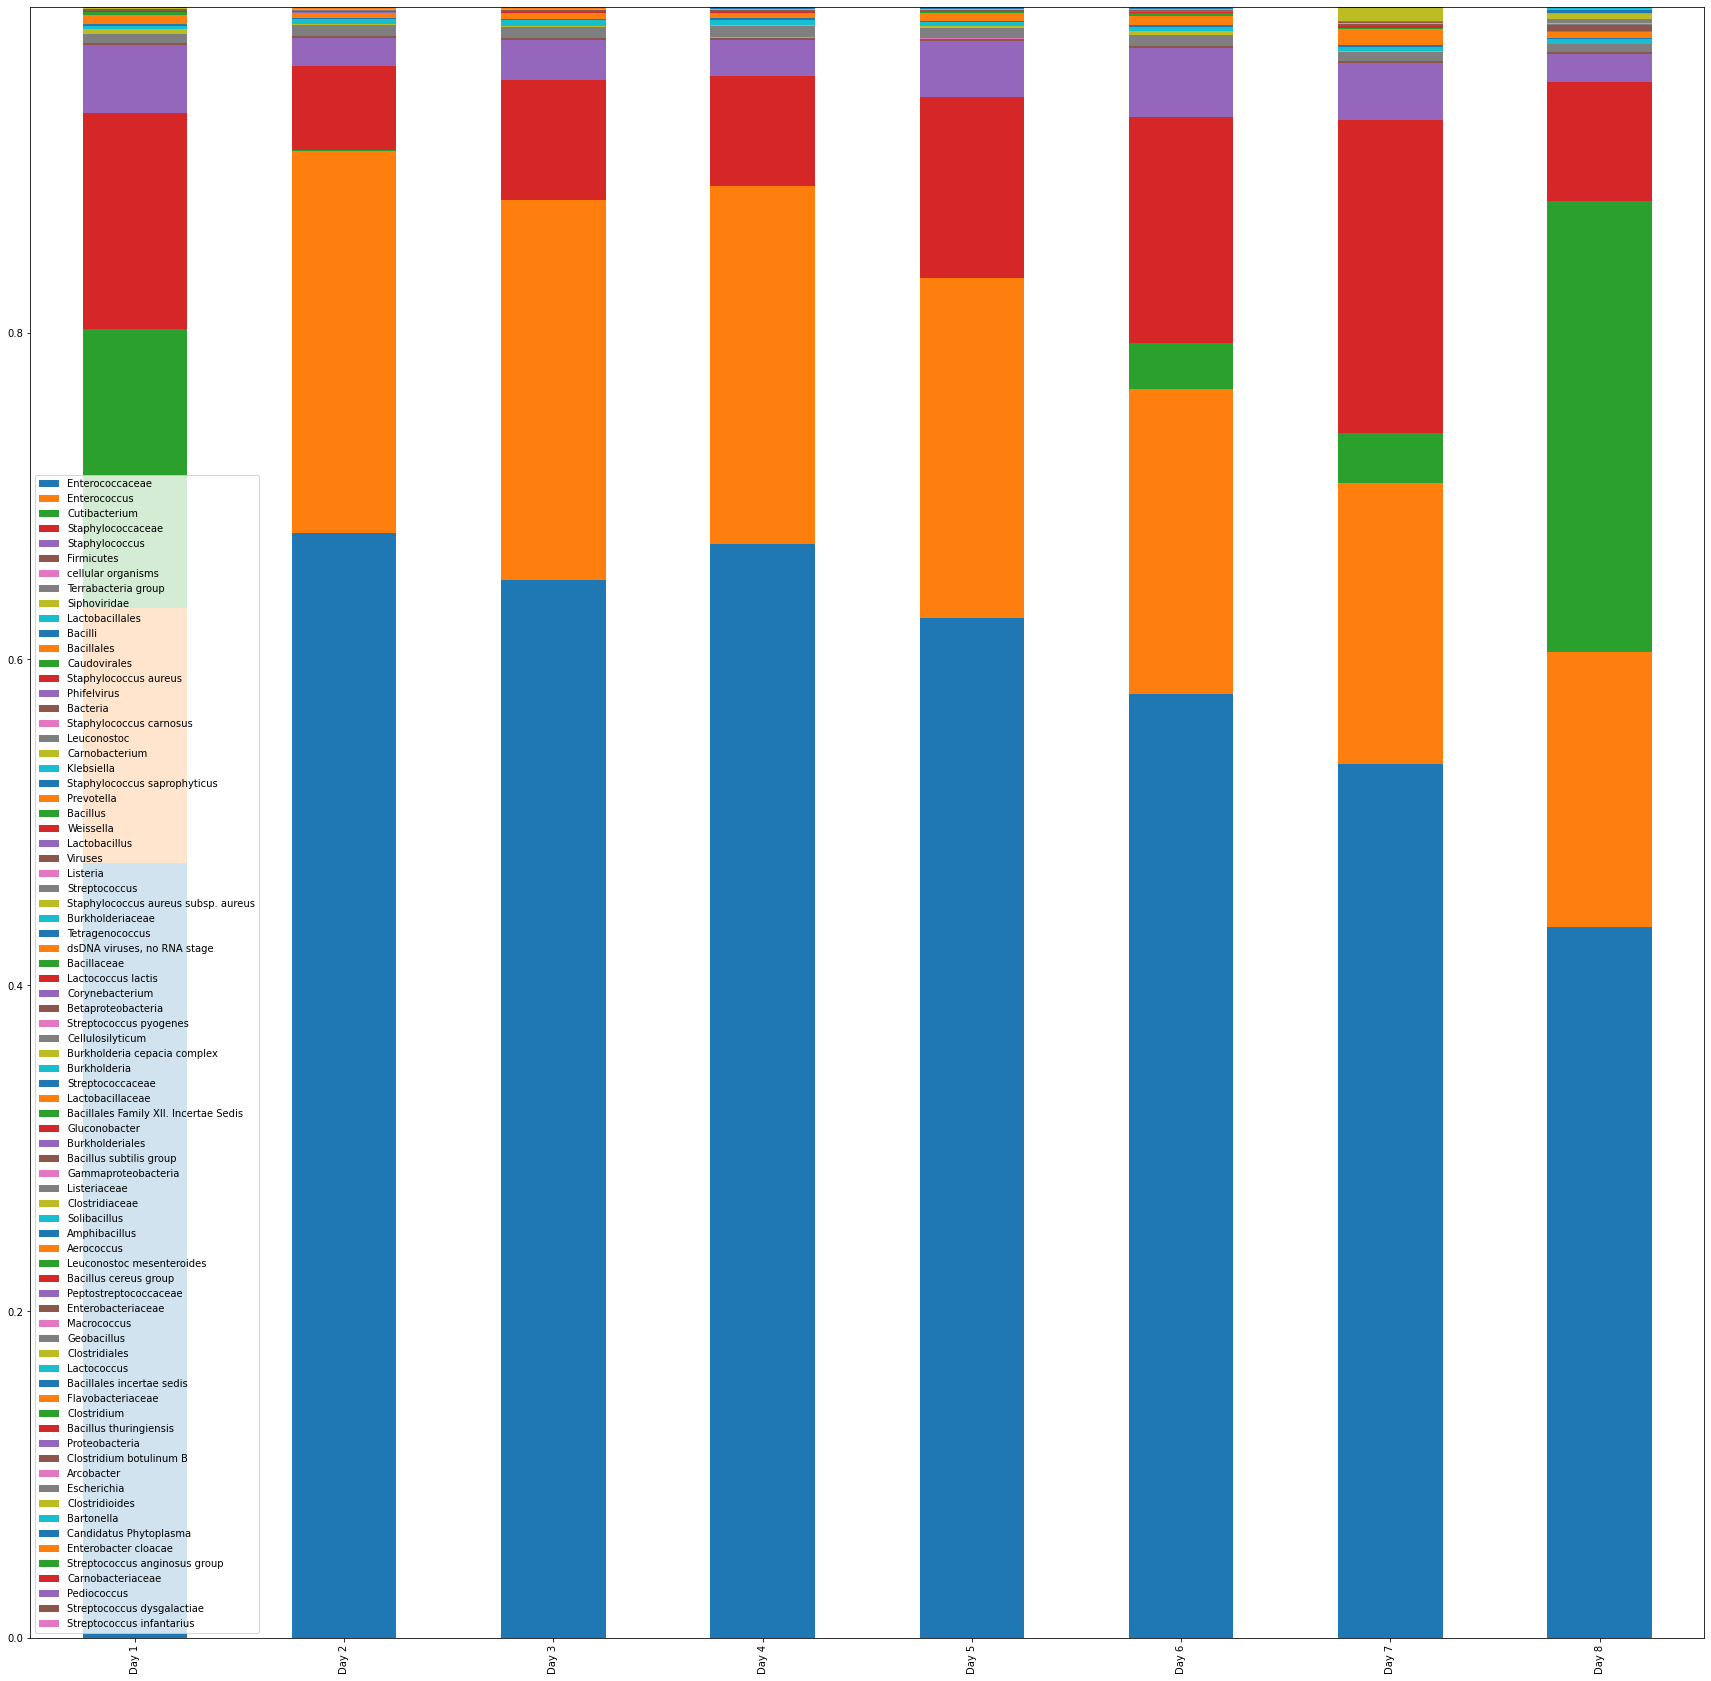

In [9]:
ax = normalized_day2.transpose().plot.bar(stacked=True,figsize=(30,30))

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


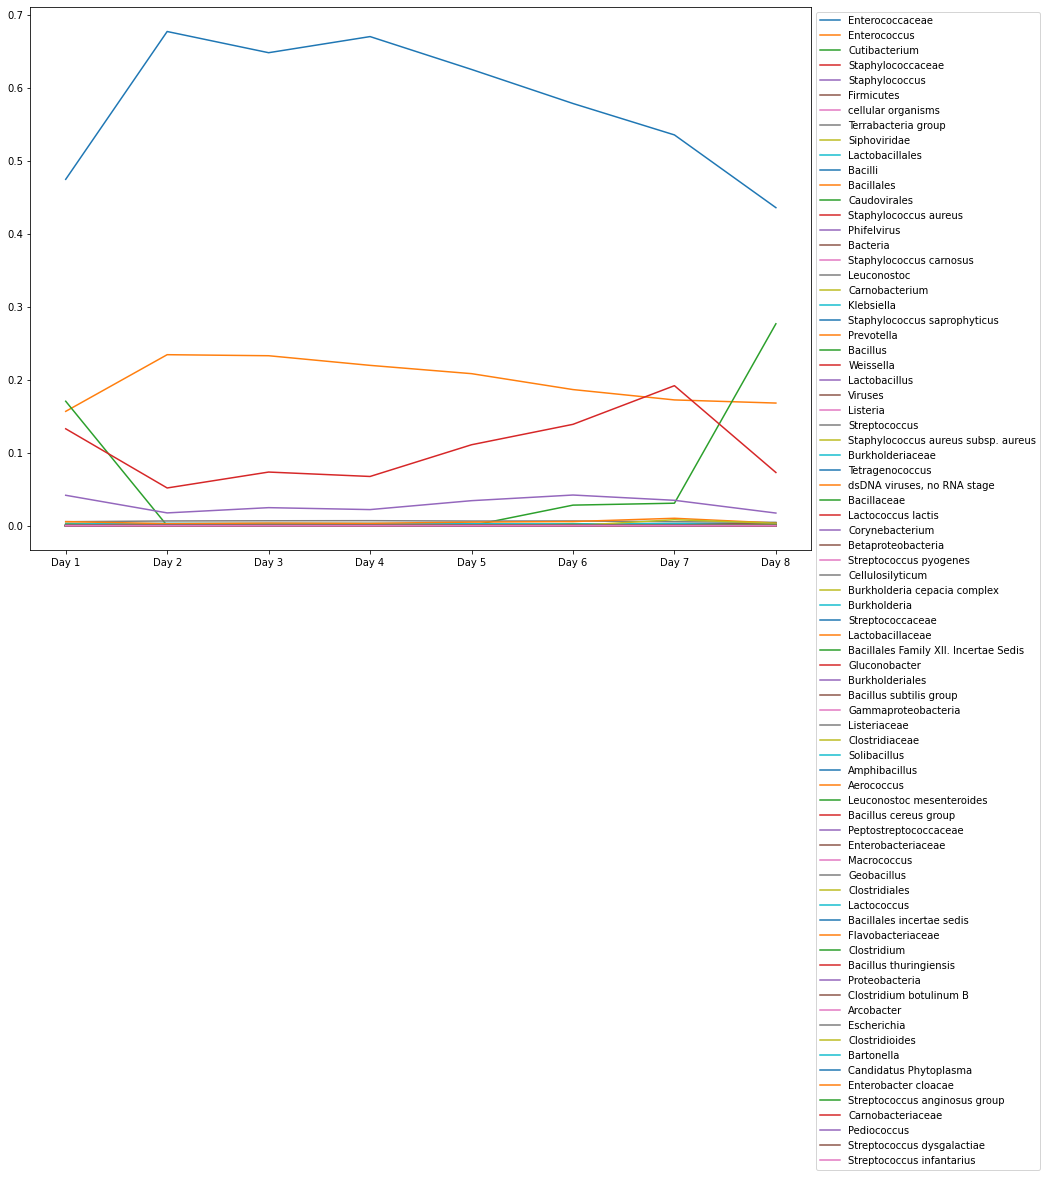

In [15]:
ax = normalized_day2.transpose().plot(figsize = (14,10))
plt.legend(bbox_to_anchor=(1,1))

The majority of the reads come from Enterococcae. Also the majority of the bacteria are from two or three populations. Over time Enterococcae and Staphylococcae loose percentage share which is picked up by Cutibacterium.

# Step 2: Deconvolute the assembled scaffolds into individual genomes

Question 2: Metrics that can be used to group contigs include specific DNA sequences, GC content, and codon usage. Specific DNA sequences that can be used to group contigs together include unique sequences such a polymorphisms found in specific genes and microsatellites which tend to have flanking regions that are unique for a taxonomic species

Question 3:  
A) 6 bins  
B) They represent 13187322 bases. The total sequence was 38071686 (see python script that can count this). Thus the bins represent at a minimum of around 34.6% of the assembly.  
C) Prokaryotic genomes range from 500 kb to 12 Mb. The sizes of the bins range from around 180 kB to 1 Mb. Therefore, the bins appear to be a little small compare to the size of prokaryotic genomes.  
D) The completeness and contamination of a genome is estimated by using universal single copy genes. These genes are found in all known life and in only one copy. Completeness can be estimated by looking at the number of unique single copy genes present within a bin. Contamination can be estimated by looking at the number of single copy genes which are present in multiple copies. One may also use other marker genes to estimate completeness and contamination.  

# Step 3: Estimate the taxonomy of your putative genomes

In [9]:
# Create a dictionary from assembly.kraken to identify the sequences based on a particular contig
kraken_dict = {}
f_kraken = 'week13_data/KRAKEN/assembly.kraken'
with open(f_kraken,'r') as f:
    for line in f:
        key = line.split('\t')[0]
        temp = line.split('\t')[1].split('\n')[0]
        val = temp.split(';')[len(temp.split(';'))-1]
        kraken_dict[key] = val
kraken_dict

{'NODE_2_length_556123_cov_2361.439230': 'Enterococcus faecalis V583',
 'NODE_11_length_278925_cov_118.155370': 'Cutibacterium avidum 44067',
 'NODE_12_length_269228_cov_106.168966': 'Staphylococcus aureus subsp. aureus CN1',
 'NODE_54_length_87669_cov_104.325427': 'Staphylococcus aureus subsp. aureus CN1',
 'NODE_56_length_87142_cov_32.060330': 'Staphylococcus haemolyticus JCSC1435',
 'NODE_57_length_86315_cov_6.829585': 'Staphylococcus lugdunensis HKU09-01',
 'NODE_37_length_104471_cov_13.881081': 'Rivularia sp. PCC 7116',
 'NODE_38_length_103247_cov_116.121288': 'Staphylococcus aureus subsp. aureus CN1',
 'NODE_39_length_102946_cov_109.479955': 'Staphylococcus aureus subsp. aureus CN1',
 'NODE_40_length_102363_cov_33.084783': 'Staphylococcus haemolyticus JCSC1435',
 'NODE_19_length_199764_cov_200.017410': 'Anaerococcus prevotii DSM 20548',
 'NODE_20_length_181746_cov_381.691663': 'Staphylococcus epidermidis RP62A',
 'NODE_21_length_175135_cov_99.919448': 'Staphylococcus aureus subsp

In [32]:
# read the bins.fa data and identify the number of contigs that belong to a particular species
bins = []
for i in range(1,9):
    f_in = 'bins/bin.%(num)s.fa' %{"num": str(i)}
    print(f_in)
    contig_group = {}
    with open(f_in,'r') as f:
        for line in f:
            if line[0] == '>':
                key = line.split('>')[1].split('\n')[0]
                try:
                    name = kraken_dict[key]
                except KeyError:
                    pass
                contig_group.setdefault(name,0)
                contig_group[name] += 1
    bins.append(contig_group)

bins/bin.1.fa
bins/bin.2.fa
bins/bin.3.fa
bins/bin.4.fa
bins/bin.5.fa
bins/bin.6.fa
bins/bin.7.fa
bins/bin.8.fa


In [33]:
bins[0]

{'Staphylococcus haemolyticus JCSC1435': 46,
 'Staphylococcus epidermidis RP62A': 3,
 'Staphylococcus epidermidis ATCC 12228': 4,
 'Staphylococcus aureus subsp. aureus CN1': 1,
 'Staphylococcus epidermidis': 2,
 'Staphylococcus aureus subsp. aureus Mu50': 3,
 'Staphylococcus aureus subsp. aureus USA300': 2,
 'Staphylococcus aureus subsp. aureus': 1,
 'Staphylococcus aureus CA-347': 1,
 'Staphylococcus aureus subsp. aureus 11819-97': 1,
 'Staphylococcus aureus subsp. aureus ST398': 2,
 'Staphylococcus aureus subsp. aureus 6850': 1,
 'Staphylococcus aureus subsp. aureus MSSA476': 1,
 'Anaerococcus prevotii DSM 20548': 2,
 'Staphylococcus aureus subsp. aureus ECT-R 2': 1,
 'Staphylococcus': 1}

In [34]:
bins[1]

{'Leuconostoc citreum KM20': 208,
 'Leuconostoc kimchii IMSNU 11154': 6,
 'Leuconostoc gelidum JB7': 1,
 'Leuconostoc mesenteroides subsp. mesenteroides ATCC 8293': 1,
 'Streptococcus thermophilus LMD-9': 1}

In [35]:
bins[2]

{'Staphylococcus lugdunensis HKU09-01': 35,
 'Staphylococcus lugdunensis N920143': 29,
 'Staphylococcus lugdunensis': 10}

In [36]:
bins[3]

{'Enterococcus faecalis OG1RF': 2,
 'Enterococcus faecalis V583': 2,
 'Enterococcus faecalis str. Symbioflor 1': 1,
 'Enterococcus faecalis D32': 1}

In [37]:
bins[4]

{'Cutibacterium avidum 44067': 12}

In [38]:
bins[5]

{'Staphylococcus epidermidis RP62A': 49,
 'Staphylococcus epidermidis ATCC 12228': 22,
 'Staphylococcus epidermidis': 2}

In [39]:
bins[6]

{'Staphylococcus aureus subsp. aureus CN1': 50,
 'Staphylococcus aureus subsp. aureus TCH60': 2,
 'Staphylococcus aureus subsp. aureus': 3,
 'Staphylococcus aureus subsp. aureus MRSA252': 1,
 'Staphylococcus aureus subsp. aureus JKD6159': 1,
 'Staphylococcus epidermidis': 1,
 'Staphylococcus aureus': 2}

In [40]:
bins[7]

{'Anaerococcus prevotii DSM 20548': 3,
 'Finegoldia magna ATCC 29328': 2,
 'Streptococcus anginosus C238': 1,
 'Clostridium': 1,
 'Clostridium novyi NT': 1}

Question 4:  
A) My predictions for the bins are that most of them will consist of Enterococcae, Enterococcus, Staphylococcacae, or Cutibacterium because those were the most common bacteria in the initial plots.  
B) One could search the metagenomic bin for sequences that are unique to a particular taxonomy. Furthermore, one could compare the sequences between various bins and find unique sequences. This would allow for the identification of unique genes which would allow differentiation between the bins. 

# Step 4: Make a heatmap of the individual bind abundances over time

In [44]:
import pandas as pd

data=pd.read_csv("abundance_table.tab",delimiter='\t')
abundance_chart = data.copy(deep=True)
abundance_chart = abundance_chart[["Genomic bins","SRR492183","SRR492185",
"SRR492186","SRR492188","SRR492190","SRR492193","SRR492194","SRR492197"]]
species =["Staphylococcus haemolyticus JCSC1435","Enterococcus faecalis OG1RF","Leuconostoc citreum KM20",
                   "Cutibacterium avidum 44067","Staphylococcus epidermidis RP62A","Staphylococcus aureus subsp. aureus CN1",
                   "Anaerococcus prevotii DSM 20548","Staphylococcus lugdunensis HKU09-01"]
abundance_chart["Genomic bins"]=species
a=abundance_chart.set_index("Genomic bins")
a.columns=['Day 0','Day 1','Day 2','Day 3', 'Day 4','Day 5','Day 6','Day 7']
a

,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Genomic bins,,,,,,,,
Staphylococcus haemolyticus JCSC1435,50.103235,175.127948,167.273691,102.432386,14.523105,172.449773,53.357374,72.544371
Enterococcus faecalis OG1RF,4115.242526,9219.720953,9348.741359,8139.870719,5267.858711,6267.155205,6550.505763,8745.103316
Leuconostoc citreum KM20,1.751119,9.170054,8.887730,5.838109,4.583909,1.804228,3.259988,19.275630
Cutibacterium avidum 44067,1566.783656,0.747395,0.552469,0.875860,1.251430,315.740755,457.543378,4250.653466
Staphylococcus epidermidis RP62A,1335.147536,850.342196,820.872805,1033.761424,1071.641137,1670.022745,1187.660153,936.681889
Staphylococcus aureus subsp. aureus CN1,1.287979,2.312693,1.452063,1.347894,3.287205,6.459688,1124.427189,590.194971
Anaerococcus prevotii DSM 20548,0.186461,0.181546,0.065351,4.223711,0.259990,1.211367,73.851083,3366.910935
Staphylococcus lugdunensis HKU09-01,2.555610,6.237916,6.194380,0.475050,0.491073,78.291586,6.639770,10.595311


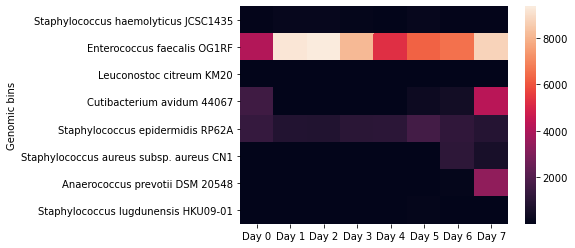

In [48]:
import seaborn as sns
import matplotlib as plt
ax=sns.heatmap(a)

Question 5:  
The genomic abundance analysis agrees with the conclusions that were derived from looking at the read taxonomy distributions. The highest amount of reads lies with Enterococcus faecalis which is a member of the Enterococcae family. Furthermore, Cutibacterium increases in frequency towards the end. One difference is that Anaerococcus prevotii also increases in frequency, but this does not appear to be picked up in the charts in part 1.